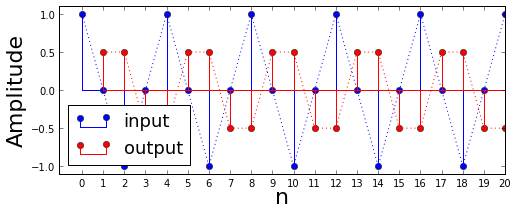

In [1]:
from __future__ import  division
from scipy import signal
   
Ns=30 # length of input sequence
n= arange(Ns) # sample index
x = cos(arange(Ns)*pi/2.)
y= signal.lfilter([1/2.,1/2.],1,x)

fig,ax = subplots(1,1)
fig.set_size_inches(8,3)

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[1:],y[:-1],markerfmt='ro',linefmt='r-',label='output')
ax.plot(n[1:],y[:-1],'r:')
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=22)
ax.legend(loc=0,fontsize=18)
ax.set_xticks(n)
ax.set_xlim(xmin=-1.1,xmax=20)
ax.set_ylabel("Amplitude",fontsize=22);

This shows the input/output time-domain response of the two-tap moving
average filter. Note that the output is delayed by one sample because
of the filter's transient. The frequency domain response for this
filter is shown below. The input frequency is $\omega=\pi/2$.

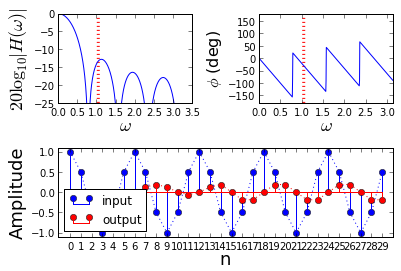

In [2]:
from matplotlib import gridspec

fig=figure()
#fig.set_size_inches((8,5))

gs = gridspec.GridSpec(2,2)
# add vertical and horizontal space
gs.update(wspace=0.5, hspace=0.5)

ax = fig.add_subplot(subplot(gs[0,0]))

ma_length = 8 # moving average filter length
w,h=signal.freqz(ones(ma_length)/ma_length,1)
ax.plot(w,20*log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)

ax = fig.add_subplot(subplot(gs[0,1]))
ax.plot(w,angle(h,deg=True))
ax.set_xlabel(r'$\omega$',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = pi)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(pi/3,-180,180,linestyles=':',color='r',lw=3.)

ax = fig.add_subplot(subplot(gs[1,:]))
Ns=30
n= arange(Ns)
x = cos(arange(Ns)*pi/3.)
y= signal.lfilter(ones(ma_length)/ma_length,1,x)

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],
        markerfmt='ro',
        linefmt='r-',
        label='output')
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("Amplitude",fontsize=18);

The top left shows the magnitude response of the 8-tap
filter. The top left shows the corresponding phase response. The
bottom plot shows the input/output time-domain response
for the input at frequency $\omega=\pi/3$.

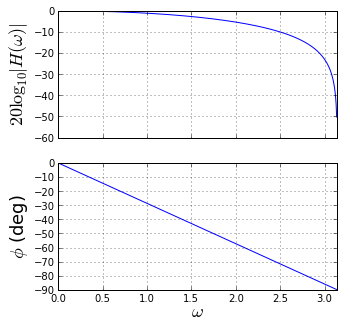

In [3]:
from scipy import signal 

fig, axs = subplots(2,1,sharex=True)
subplots_adjust(hspace = .2)
fig.set_size_inches((5,5))

ax=axs[0]
w,h=signal.freqz([1/2., 1/2.],1) # Compute impulse response
ax.plot(w,20*log10(abs(h)))
ax.set_ylabel(r"$20 \log_{10} |H(\omega)| $",fontsize=18)
ax.grid()

ax=axs[1]
ax.plot(w,angle(h,deg=True))
ax.set_xlabel(r'$\omega$',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=18)
ax.set_xlim(xmax = pi)
ax.grid()

The top plot in figure shows the magnitude response of the filter (in dB) and the bottom plot shows  the phase response in degrees. At $\omega=0$, we have $|H(\omega=0)|=1 $ (i.e unity-gain) which says that our moving average filter does not change the amplitude of signals at $\omega=0$. We observed this already with the input $x_n=1 $ that produced $y_n=1$ as output. On the graph at the other extreme ($\omega=\pi$),  we have $|H(\omega=\pi)|=0$ which we observed earlier for input $x_n= \exp\left( j\pi n \right)  \forall n \ge 0 $ that produced all-zero output. 

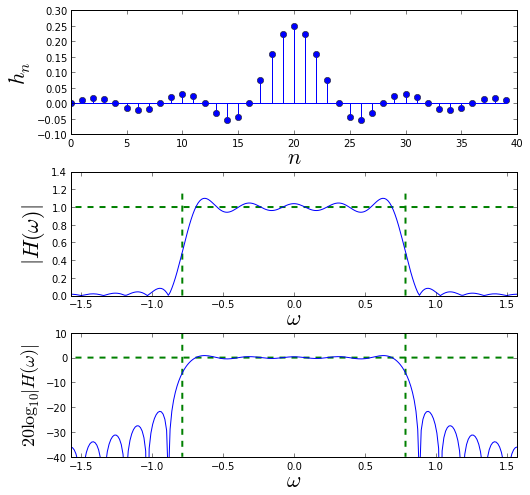

In [4]:
from scipy import signal
from numpy import fft

wc = pi/4
M=20
N = 512 # DFT size
n = arange(-M,M)
h = wc/pi * sinc(wc*(n)/pi)  # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = subplots(3,1)
fig.set_size_inches((8,8))
subplots_adjust(hspace=0.3)

ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("$n$",fontsize=22)
ax.set_ylabel("$h_n$",fontsize=22)

ax=axs[1]
ax.plot(w-pi,abs(fft.fftshift(Hh)))
ax.axis(xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2.,linestyle='--',)
ax.hlines(1,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$|H(\omega)| $",fontsize=22)

ax=axs[2]
ax.plot(w-pi,20*log10(abs(fft.fftshift(Hh))))
ax.axis(ymin=-40,xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],10,-40,color='g',lw=2.,linestyle='--',)
ax.hlines(0,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $",fontsize=18)

Figure that shows the filter coefficients in the top plot, the magnitude of the frequency response in the middle plot (linear units), and the magnitude of the frequency response in decibel units in the bottom plot. In this case, we use a Hamming window to control the Gibbs phenomenon at the edges of the passband. Note that the entire passband is much flatter than the previous case without the Hamming window.


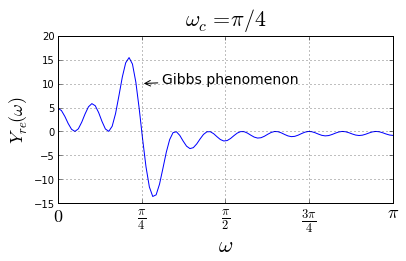

In [5]:
fig,ax = subplots()
fig.set_size_inches(6,3)

k=arange(M)
omega = linspace(0,pi,100)

ax.plot(omega,(sin(k*omega[:,None]+k*wc)
                 -sin(k*omega[:,None]-k*wc)).sum(axis=1))
ax.set_ylabel(r"$Y_{re}(\omega)$",fontsize=18)
ax.grid()
t=ax.set_title(r"$\omega_c = \pi/4$",fontsize=22)
t.set_y(1.03) # scoot title up a bit
ax.set_xlabel(r"$\omega$",fontsize=22)
# setup xticks and labels for LaTeX
ax.set_xticks([0, pi/4,pi/2.,3*pi/4, pi,])
ax.set_xticklabels(['$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',
                    r'$\frac{3\pi}{4}$', r'$\pi$'],fontsize=18)
ax.set_xlim(xmax=pi)
ax.annotate("Gibbs phenomenon",xy=(pi/4,10),fontsize=14,
            xytext=(20,0),
            textcoords='offset points',
            arrowprops={'facecolor':'b','arrowstyle':'->'})

Figure that shows the Gibbs phenomenon at the edge of the filter's passband. The cutoff frequency is $\omega_c$.

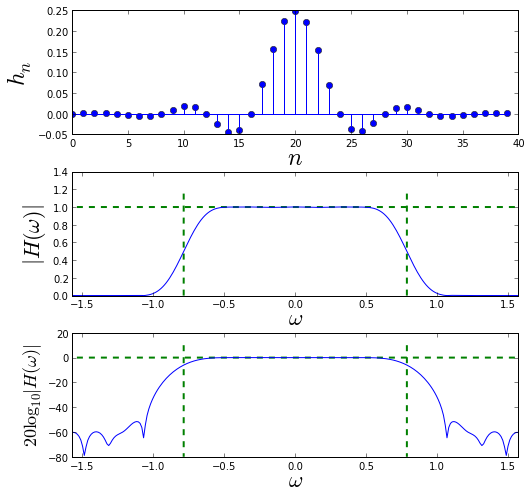

In [6]:
wc = pi/4

M=20

N = 512 # DFT size
n = arange(-M,M)
win = signal.hamming(len(n))
h = wc/pi * sinc(wc*(n)/pi)*win  # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = subplots(3,1)
fig.set_size_inches((8,8))
subplots_adjust(hspace=0.3)

ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_n$",fontsize=24)

ax=axs[1]
ax.plot(w-pi,abs(fft.fftshift(Hh)))
ax.axis(xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2.,linestyle='--',)
ax.hlines(1,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$|H(\omega)| $",fontsize=22)

ax=axs[2]
ax.plot(w-pi,20*log10(abs(fft.fftshift(Hh))))
ax.axis(ymin=-80,xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],10,-80,color='g',lw=2.,linestyle='--',)
ax.hlines(0,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $",fontsize=18)

Figure  that shows the filter coefficients in the top plot, the magnitude of the frequency response in the middle plot (linear units), and the magnitude of the frequency response in decibel units in the bottom plot. In this case, we use a Hamming window to control the Gibbs phenomenon at the edges of the passband. Note that the entire passband is much flatter than the previous case without the Hamming window.

In [7]:
Ns =300 # number of samples 
N = 1024 # DFT size

fs = 1e3 # sample rate in Hz
fpass = 100 # in Hz
fstop = 150 # in Hz
delta = 60 # in dB, desired attenuation in stopband

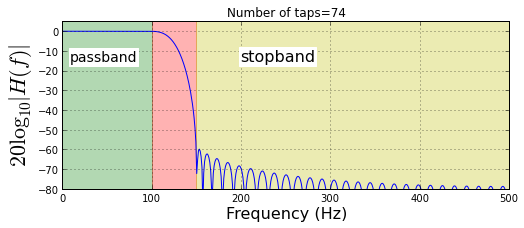

In [8]:
from matplotlib.patches import Rectangle

M,beta= signal.fir_filter_design.kaiserord(delta, (fstop-fpass)/(fs/2.))

hn = signal.firwin(M,(fstop+fpass)/2.,window=('kaiser',beta),nyq=fs/2.)
w,H = signal.freqz(hn) # frequency response

fig,ax = subplots()
fig.set_size_inches((8,3))

ax.plot(w/pi*fs/2.,20*log10(abs(H)))
ax.set_xlabel("Frequency (Hz)",fontsize=16)
ax.set_ylabel(r"$20\log_{10} |H(f)| $",fontsize=22)
ymin,ymax = -80,5
ax.axis(ymin = ymin,ymax=ymax)
ax.add_patch(Rectangle((0,ymin),width=fpass,
             height=ymax-ymin,
             color='g',alpha=0.3))
ax.add_patch(Rectangle((fpass,ymin),width=fstop-fpass,
             height=ymax-ymin,
             color='r',alpha=0.3))
ax.add_patch(Rectangle((fstop,ymin),width=fs/2-fstop,
             height=ymax-ymin,
             color='y',alpha=0.3))
ax.set_title("Number of taps=%d"%M)
ax.text(10,-15,'passband',fontsize=14,bbox=dict(color='white'))
ax.text(200,-15,'stopband',fontsize=16,bbox=dict(color='white'))
ax.grid()

Figure
showing the passband region, the transition region, and
the stopband region from the filter specification. The
specification called for 60 dB of attenuation in the stopband
and that is clearly shown at the stopband cutoff frequency (150 Hz).


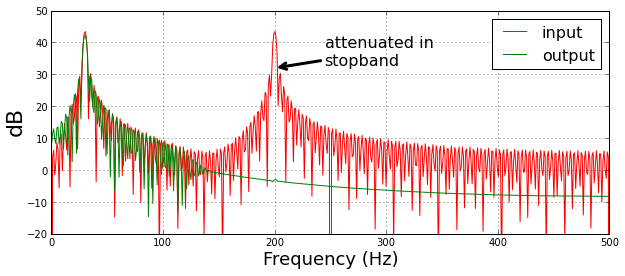

In [9]:
from numpy import fft

t = arange(0,Ns)/fs
x = cos(2*pi*30*t)+cos(2*pi*200*t)
X = fft.fft(x,N)

y=signal.lfilter(hn,1,x)
Y = fft.fft(y,N)

fig,ax = subplots()
fig.set_size_inches((10,4))
ax.plot(arange(N)/N*fs,20*log10(abs(X)),'r-',label='input')
ax.plot(arange(N)/N*fs,20*log10(abs(Y)),'g-',label='output')
ax.set_xlim(xmax = fs/2)
ax.set_ylim(ymin=-20)
ax.set_ylabel(r'dB',fontsize=22)
ax.set_xlabel("Frequency (Hz)",fontsize=18)
ax.grid()
ax.annotate('attenuated in\nstopband',fontsize=16,xy=(200,32),
             xytext=(50,3),textcoords='offset points',
             arrowprops=dict(arrowstyle='->',lw=3),
            )
ax.legend(loc=0,fontsize=16);

Figure  showing the application of the filter on two equal-amplitude input tones where one tone is in the passband and the other in the stopband. The tone in the passband passes through to the output but the tone in the stopband is completely eliminated by the filter because the attenuation in the stopband is 60 dB and the tone is only 40 dB.  

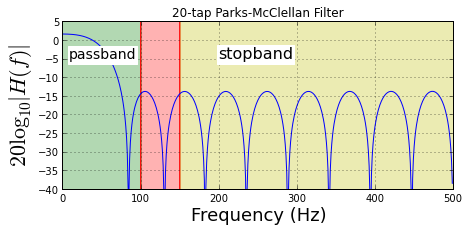

In [10]:
from matplotlib.patches import Rectangle
from scipy import signal

fs = 1e3 # sample rate in Hz
M = 20
fpass = 100 # in Hz
fstop = 150 # in Hz

hn = signal.remez(M,
                 array([0, fpass, fstop, fs])/2., # scaled passband, and stop band 
                 [1,0],  # low pass filter
                 Hz = fs, # sampling frequency
                 )

w,H=signal.freqz(hn,1) # frequency response

def apply_plot_overlay():
    'convenience function to illustrate stop/passband in frequency response plot'
    ax.plot(w/pi*(fs/2),20*log10(abs(H)),label='Filter response')
    ax.set_ylim(ymax=5)
    ax.vlines(100,*ax.get_ylim(),color='r')
    ax.vlines(150,*ax.get_ylim(),color='r')
    ax.set_ylim(ymin=-40)
    ax.set_xlabel("Frequency (Hz)",fontsize=18)
    ax.set_ylabel(r"$20\log_{10}|H(f)|$",fontsize=22)
    ax.add_patch(Rectangle((0,-40),width=fpass,height=45,color='g',alpha=0.3))
    ax.add_patch(Rectangle((fpass,-40),width=fstop-fpass,height=45,color='r',alpha=0.3))
    ax.add_patch(Rectangle((fstop,-40),width=fs/2-fstop,height=45,color='y',alpha=0.3))
    ax.text(10,-5,'passband',fontsize=14,bbox=dict(color='white'))
    ax.text(200,-5,'stopband',fontsize=16,bbox=dict(color='white'))
    ax.grid()
    
fig,ax = subplots()
fig.set_size_inches((7,3))
apply_plot_overlay()
ax.set_title('%d-tap Parks-McClellan Filter'%M)

Figure showing the magnitude response of the filter we designed using the Parks-McClellan methods.

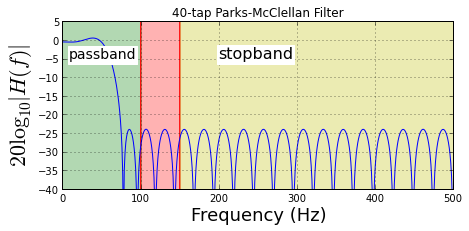

In [11]:
M = 40 # double filter length
hn = signal.remez(M,
                 array([0, fpass, fstop, fs])/2., # scaled passband, and stop band 
                 [1,0],  # low pass filter
                 Hz = fs, # sampling frequency
                 )

w,H=signal.freqz(hn,1) # frequency response
fig,ax = subplots()
fig.set_size_inches((7,3))
apply_plot_overlay()
ax.set_title('%d-tap Parks-McClellan Filter'%M)

Figure showing the frequency response when the filter order is doubled. As compared to the previous case, the attenuation in the stopband has improved, but now there is significant distortion in the passband.

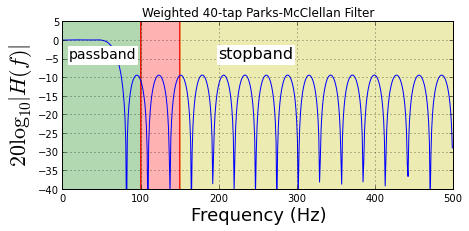

In [12]:
hn = signal.remez(M,
                 array([0, fpass, fstop, fs])/2., # scaled passband, and stop band 
                 [1,0],  # low pass filter
                 weight=[100,1], # passband 100 times more important than stopband
                 Hz = fs, # sampling frequency
                 )

w,H=signal.freqz(hn,1) # frequency response
fig,ax = subplots()
fig.set_size_inches((7,3))
apply_plot_overlay()
ax.set_title('Weighted %d-tap Parks-McClellan Filter'%M)

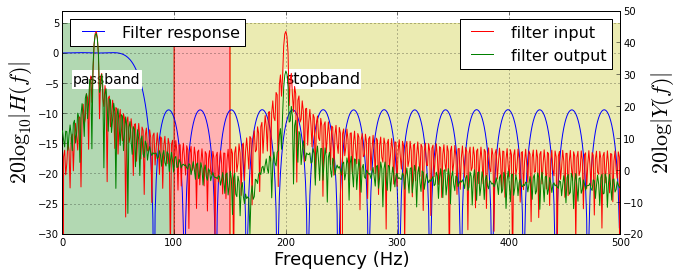

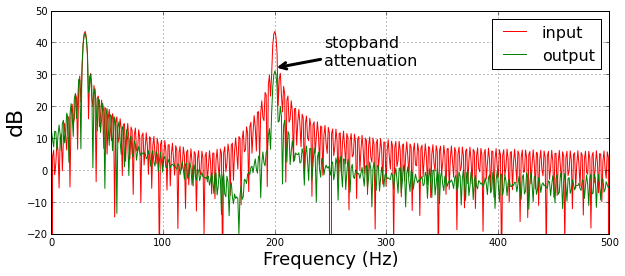

In [13]:
Ns =300 # number of samples 
N = 1024 # DFT size
t = arange(0,Ns)/fs

x = cos(2*pi*30*t)+cos(2*pi*200*t)
#x = x*signal.hamming(Ns) # try windowing also!
X = fft.fft(x,N)

y=signal.lfilter(hn,1,x)
Y = fft.fft(y,N)

fig,ax = subplots()
fig.set_size_inches((10,4))
apply_plot_overlay()
ax.set_ylim(ymin=-30,ymax=7)
ax.legend(loc='upper left',fontsize=16)

ax2 = ax.twinx()
ax2.plot(arange(N)/N*fs,20*log10(abs(X)),'r-',label='filter input')
ax2.plot(arange(N)/N*fs,20*log10(abs(Y)),'g-',label='filter output')
#ax2.plot(arange(N)/N*fs,20*log10(abs(X)*abs(H)),'g:',lw=2.,label='YY')
ax2.set_xlim(xmax = fs/2)
ax2.set_ylim(ymin=-20)
ax2.set_ylabel(r'$20\log|Y(f)|$',fontsize=22)
ax2.legend(loc=0,fontsize=16);

fig,ax = subplots()
fig.set_size_inches((10,4))
ax.plot(arange(N)/N*fs,20*log10(abs(X)),'r-',label='input')
ax.plot(arange(N)/N*fs,20*log10(abs(Y)),'g-',label='output')
ax.set_xlim(xmax = fs/2)
ax.set_ylim(ymin=-20)
ax.set_ylabel('dB',fontsize=22)
ax.set_xlabel("Frequency (Hz)",fontsize=18)
ax.grid()
ax.annotate('stopband\nattenuation',fontsize=16,xy=(200,32),
             xytext=(50,3),textcoords='offset points',
             arrowprops=dict(arrowstyle='->',lw=3),
            )
ax.legend(loc=0,fontsize=16);

Figure showing the filter applied to two inputs tones, one in the passband and the other in the stopband. Because we preferentially weighted the passband over the stopband, the tone in the stopband still comes through because the attenuation there is only 10 dB and the signal peaks at approximately 40 dB. This leaves roughly 30 dB of signal left as shown.

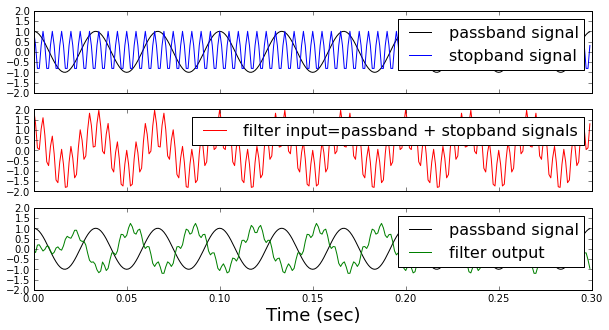

In [14]:
x_pass = cos(2*pi*30*t) # passband signal
x_stop = cos(2*pi*200*t) # stopband signal
x = x_pass + x_stop
y=signal.lfilter(hn,1,x)

fig,axs = subplots(3,1,sharey=True,sharex=True)
fig.set_size_inches((10,5))

ax=axs[0]
ax.plot(t,x_pass,label='passband signal',color='k')
ax.plot(t,x_stop,label='stopband signal')
ax.legend(loc=0,fontsize=16)

ax=axs[1]
ax.plot(t,x,label='filter input=passband + stopband signals',color='r')
ax.legend(loc=0,fontsize=16)

ax=axs[2]
ax.plot(t,x_pass,label='passband signal',color='k')
ax.plot(t,y,label='filter output',color='g')
ax.set_xlabel("Time (sec)",fontsize=18)
ax.legend(loc=0,fontsize=16);

Figure breaks down the time-domain response of the filter.  The top plot shows the two signals separately. The middle plot shows the sum of these two signals that is the filter's input. The bottom plot shows the filter's output compared to the input signal that was in the filter's passband. The hope for this filter was that the tone in the passband would be the only signal to survive at the output.  In the bottom plot in figure, observe that the output signal is shifted compared to the input. This is due the phase response of the filter. Because this is a FIR filter, this phase is linear. Also notice that the stopband signal that caused the ripple at the filter's input is still obvious in the filter's output. This is a result of the relatively poor 10 dB attenuation in the stopband that we noted earlier. If we want to eliminate this rippling effect entirely, we have to design a filter with much greater  attenuation in the stopband.